In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import Ridge
from sklearn.cross_validation import train_test_split

/Users/ziranmin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('train_cleaned.csv')

In [4]:
data.shape

(1456, 204)

In [5]:
x = data.loc[:,'2ndFlrSF_log':'SaleType_WD']

In [6]:
y = data.loc[:,'SalePrice_log':'SalePrice_log']

In [7]:
train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.2, random_state=0)

In [26]:
x.shape

(1456, 202)

In [7]:
reg = Ridge(alpha=3.3)

In [28]:
reg.fit(train_x,train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
reg.score(train_x, train_y)

0.9409834255235592

In [30]:
reg.score(test_x, test_y)

0.8965632763007689

In [31]:
reg.coef_

array([[-4.88063359e-03, -2.62420862e-03,  1.52178020e-02,
        -5.60004147e-02,  2.09955146e-02, -1.44098995e-02,
         7.04054525e-03, -4.31406044e-03, -7.25651409e-04,
        -1.40946114e-02,  6.88195399e-02,  2.86470593e-02,
        -4.78802637e-02, -2.05737389e-03, -3.37881871e-04,
         1.84967373e-02, -6.95848915e-02,  5.34229594e-03,
        -1.99097630e-04,  3.93516504e-02,  1.02944776e-01,
         9.79113567e-02,  9.84071812e-02,  2.94977401e-02,
        -6.25368009e-03, -6.26620393e-03,  5.19695463e-01,
         3.71697220e-02, -1.87355957e-02, -1.23394271e-01,
        -1.53898502e-03,  8.30357160e-02,  3.25331704e-02,
         1.08529752e-02, -1.23676391e-02, -2.44291543e-02,
        -3.08111905e-03, -3.11226146e-03,  7.26321302e-04,
         7.11137049e-03,  2.16962808e-01,  5.77853091e-02,
         2.26424095e-02,  3.04671293e-02, -3.02439538e-02,
         1.43392689e-02,  1.31926539e-01,  2.19260696e-02,
         1.54555808e-02,  5.59395048e-02,  1.24826078e-0

In [32]:
reg.predict(test_x)

array([[11.81855511],
       [12.37152104],
       [11.44242273],
       [11.89089763],
       [12.6244936 ],
       [11.82571437],
       [12.28541011],
       [12.63995732],
       [11.28026465],
       [11.73761422],
       [12.71304823],
       [12.30346586],
       [12.27600623],
       [12.38556417],
       [12.24839623],
       [12.18218161],
       [12.1159954 ],
       [11.67056894],
       [11.66946855],
       [12.10915561],
       [12.12978741],
       [11.80414009],
       [11.3219639 ],
       [11.74434439],
       [12.76358937],
       [11.65165829],
       [12.07073482],
       [11.82658809],
       [12.62683775],
       [12.32070131],
       [11.9533633 ],
       [12.02222978],
       [12.25569658],
       [11.8606088 ],
       [12.21223737],
       [11.62718398],
       [11.78789584],
       [11.60497729],
       [12.27734194],
       [11.80389663],
       [11.83024037],
       [11.85361864],
       [11.54706146],
       [12.09386921],
       [12.27083053],
       [12

# Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 4))
    return(rmse)

In [10]:
rmse_cv(reg).mean()

0.12103630684808522

In [12]:
reg

Ridge(alpha=3.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

# See Coefficients

In [ ]:
# See Coefficients

In [36]:
reg.fit(x,y)

Ridge(alpha=3.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
coef = pd.Series(reg.coef_.reshape(-1), index = x.columns)

In [38]:
coef.sort_values()

Neighborhood_MeadowV    -0.106102
KitchenAbvGr_log        -0.094640
Neighborhood_IDOTRR     -0.090511
ExterQual_log           -0.085161
KitchenQual_Fa          -0.085006
KitchenQual_TA          -0.084941
Heating_Grav            -0.082920
Neighborhood_Edwards    -0.078614
Neighborhood_OldTown    -0.071893
KitchenQual_Gd          -0.071270
Neighborhood_Mitchel    -0.063301
GarageType_CarPort      -0.062309
Exterior1st_BrkComm     -0.061110
BsmtQual_log            -0.056922
LotConfig_FR3           -0.055791
Condition1_RRAe         -0.054091
Neighborhood_NWAmes     -0.051740
LotConfig_FR2           -0.047647
BldgType_2fmCon         -0.044585
Neighborhood_Gilbert    -0.042976
RoofMatl_Tar&Grv        -0.041062
Neighborhood_Sawyer     -0.039639
BldgType_Twnhs          -0.039104
BldgType_TwnhsE         -0.038930
Neighborhood_NAmes      -0.034631
RoofStyle_Gambrel       -0.034021
MiscFeature_TenC        -0.031536
Foundation_Wood         -0.029943
Condition2_RRAn         -0.027597
MiscFeature_Ot

In [39]:
coef.sort_values()[10::-1]

Neighborhood_Mitchel   -0.063301
KitchenQual_Gd         -0.071270
Neighborhood_OldTown   -0.071893
Neighborhood_Edwards   -0.078614
Heating_Grav           -0.082920
KitchenQual_TA         -0.084941
KitchenQual_Fa         -0.085006
ExterQual_log          -0.085161
Neighborhood_IDOTRR    -0.090511
KitchenAbvGr_log       -0.094640
Neighborhood_MeadowV   -0.106102
dtype: float64

In [40]:
coef.sort_values()[-1:-11:-1]

GrLivArea_log           0.484040
OverallCond_log         0.206812
MSZoning_FV             0.143173
MSZoning_RL             0.132750
Neighborhood_StoneBr    0.128238
MSZoning_RM             0.127001
MSZoning_RH             0.120092
GarageCars_log          0.113101
RoofMatl_WdShngl        0.103540
Neighborhood_NoRidge    0.095554
dtype: float64

In [41]:
imp_coef = pd.concat([coef.sort_values()[-1:-11:-1],coef.sort_values()[10::-1]])

In [42]:
imp_coef

GrLivArea_log           0.484040
OverallCond_log         0.206812
MSZoning_FV             0.143173
MSZoning_RL             0.132750
Neighborhood_StoneBr    0.128238
MSZoning_RM             0.127001
MSZoning_RH             0.120092
GarageCars_log          0.113101
RoofMatl_WdShngl        0.103540
Neighborhood_NoRidge    0.095554
Neighborhood_Mitchel   -0.063301
KitchenQual_Gd         -0.071270
Neighborhood_OldTown   -0.071893
Neighborhood_Edwards   -0.078614
Heating_Grav           -0.082920
KitchenQual_TA         -0.084941
KitchenQual_Fa         -0.085006
ExterQual_log          -0.085161
Neighborhood_IDOTRR    -0.090511
KitchenAbvGr_log       -0.094640
Neighborhood_MeadowV   -0.106102
dtype: float64

Text(0.5,1,'Main Coefficients in the Ridge Model')

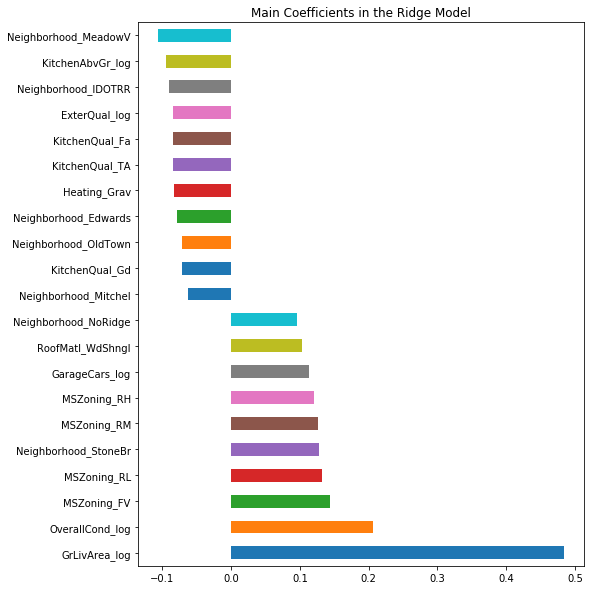

In [44]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Main Coefficients in the Ridge Model")

# Save Single Model Predicted Result for Kaggle Submission

In [17]:
data_sub = pd.read_csv('test_cleaned.csv')

In [18]:
data_sub_x = data_sub.loc[:,'2ndFlrSF_log':'SaleType_WD']

In [19]:
reg = Ridge(alpha=3.3)

In [21]:
reg.fit(x,y)

Ridge(alpha=3.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
reg.predict(data_sub_x)

array([[11.64877758],
       [11.8971323 ],
       [12.15384112],
       ...,
       [12.07343604],
       [11.70417324],
       [12.29591786]])

In [23]:
log_y_sub = reg.predict(data_sub_x)

In [24]:
log_y_sub.shape

(1459, 1)

In [25]:
sub = np.exp(log_y_sub)

In [26]:
sub1 = pd.DataFrame(sub,columns = ['SalePrice'])

In [27]:
sub2 = pd.DataFrame(np.arange(1461,2920),columns = ['Id'])

In [28]:
sub2['SalePrice'] = sub1['SalePrice']

In [29]:
sub2.to_csv('final_stack_result_single_ridge.csv',index = False)

In [1]:
#sub2